# Feuille de travaux pratiques. Interpolation polynomiale

In [13]:
# chargement des bibliothèques
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


## Exercice 1 (interpolation de Lagrange à l'aide des matrices de Vandermonde)

Soit $n$ un entier naturel. Avec NumPy, un polynôme de degré $n$, $p(x)=a_0+a_1\,x+a_2\,x^2+\dots+a_n\,x^n$, est représenté par un tableau de taille $n+1$ `p=[an,...,a2,a1,a0]` contenant les coefficients du polynôme. Si `x` est une variable réelle (ou même un tableau de réels), la commande `polyval(p,x)` permet d'évaluer le polynôme représenté par `p` au point (ou au groupe de points) considéré.

Par ailleurs, si `x` est un tableau de réels, la commande `vander(x)` renvoie la [matrice de Vandermonde](http://fr.wikipedia.org/wiki/Matrice_de_Vandermonde) associée à un ensemble de points contenu dans le tableau `x`. On remarquera en affichant une telle matrice que l'ordre des colonnes est inversé par rapport à la définition « usuelle », de manière à être consistant avec l'ordre des coefficients utilisé pour la représentation des polynômes.

**1.** Écrire une fonction `lagrange`, ayant pour arguments une fonction continue $f$, les bornes d'un intervalle $[a,b]$ de $\mathbb{R}$ et un entier naturel $n$, construisant le [polynôme d'interpolation de Lagrange](http://fr.wikipedia.org/wiki/Interpolation_lagrangienne) de degré $n$, $\Pi_nf$, associé à une distribution uniforme de $n+1$ points dans l'intervalle $[a,b]$ par résolution du système linéaire de Vandermonde associé.

In [14]:
def lagrange(f,a,b,n):
    x=np.linspace(a,b,n+1)
    y=f(x)
    return np.linalg.solve(np.vander(x),y)

**2.** Utiliser cette fonction pour construire les polynômes d'interpolation de Lagrange $\Pi_n\sin$ de la fonction sinus à noeuds équirépartis sur l'intervalle $[0,3\pi]$, avec $n=1,\dots,5$. Comparer les graphes des polynômes obtenus avec celui de la fonction donnée sur ce même intervalle.

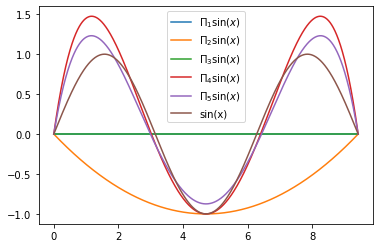

In [15]:
a=0
b=3*np.pi
# pour le tracé des graphes
x=np.linspace(a,b,1000)
for n in range(1,6):
    p=lagrange(np.sin,a,b,n)
    plt.plot(x,np.polyval(p,x),label='$\Pi_'+str(n)+'\sin(x)$')
plt.plot(x,np.sin(x),label='sin(x)')
plt.legend()

**3.** Estimer l'erreur d'interpolation
$$
E_n(\sin)=\underset{x\in[0,3\pi]}{\max}|\sin(x)-\Pi_n\sin(x)|,
$$
et représenter sur un graphe les valeurs obtenues en fonction de $n$, pour $n=1,\dots,30$, en utilisant la commande `semilogy` de Matplotlib. Que se passe-t-il pour $n>23$?

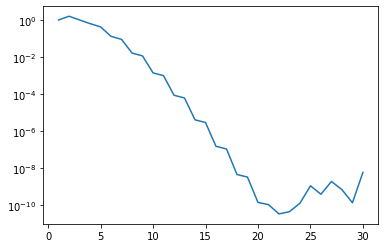

In [16]:
erreur=np.zeros(30)
for n in range(1,31):
    erreur[n-1]=max(abs(np.sin(x)-np.polyval(lagrange(np.sin,a,b,n),x)))
plt.semilogy(np.arange(1,31),erreur)

Pour $n>23$, l'erreur cesse de décroître et augmente même considérablement. Ceci est dû à une amplification des erreurs d'arrondi lors de la résolution numérique du système linéaire associé au problème d'interpolation, le conditionnement des matrices de Vandermonde étant dans le cas présent exponentiellement croissant avec l'entier $n$.

**4.** En observant que
$$
\forall k\in\mathbb{N},\ \forall x\in\mathbb{R},\ |\sin^{(k)}(x)|\leq1,
$$
comparer les valeurs de l'erreur obtenues avec celles fournies par la majoration théorique
$$
E_n(f)\leq\frac{1}{4(n+1)}\left(\frac{b-a}{n}\right)^{n+1}\underset{x\in[a,b]}{\max}|f^{(n+1)}(x)|.
$$

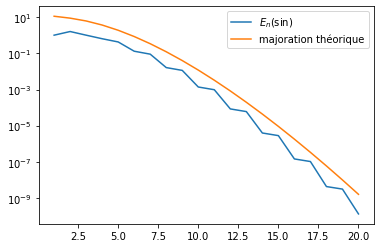

In [17]:
majoration=np.zeros(20)
for n in range(1,21):
    majoration[n-1]=((b-a)/n)**(n+1)/(4*(n+1))
plt.semilogy(np.arange(1,21),erreur[0:20],label ='$E_n(\sin)$')
plt.semilogy(np.arange(1,21),majoration,label ='majoration théorique')
plt.legend()

## Exercice 2 (phénomène de Runge et points de Chebyshev)

On considère la fonction
$$
f(x)=\frac{1}{1+x^2}
$$
sur l'intervalle $[-5,5]$.

**1.** Utiliser la fonction `lagrange` de l'exercice précédent pour construire le polynôme d'interpolation de Lagrange $\Pi_nf$ de degré $n$, avec $n=2$, $4$, $8$ et $12$, de $f$ en des n&oelig;uds équirépartis sur $[-5,5]$ et comparer graphiquement les polynômes obtenus avec la fonction donnée.

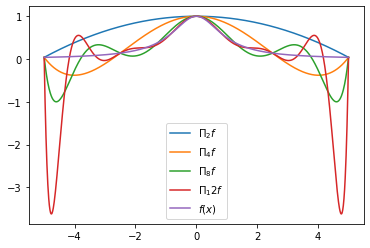

In [19]:
def f(x):
    return 1/(1+x**2)
a=-5
b=5
# pour le tracé des graphes
x=np.linspace(a,b,1000)
degres=np.array([2,4,8,12])
for n in degres:
    p=lagrange(f,a,b,n)
    plt.plot(x,np.polyval(p,x),label='$\Pi_'+str(n)+'f$')
plt.plot(x,f(x),label='$f(x)$')
plt.legend()

On observe que la disparité entre les valeurs respectives de la fonction et du polynôme d'interpolation au voisinage des bornes de l'intervalle croît avec le degré de ce dernier.

**2.** Estimer l'erreur d'interpolation
$$
E_n(f)=\underset{x\in[-5,5]}{\max}|f(x)-\Pi_nf(x)|
$$
et représenter sur un graphe les valeurs obtenues en fonction de $n$, pour $n=1,\dots,20$. Qu'observe-t-on ?

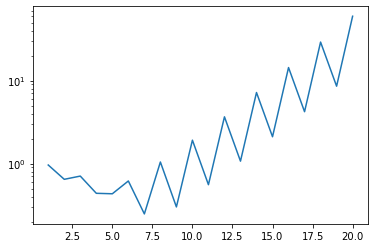

In [20]:
erreur=np.zeros(20)
for n in range(1,21):
    erreur[n-1]=max(abs(np.polyval(lagrange(f,a,b,n),x)-f(x)))
plt.semilogy(np.arange(1,21),erreur)

L'erreur a tendance à augmenter avec le degré d'interpolation. On n'a donc pas convergence du polynôme d'interpolation vers la fonction interpolée sur l'intervalle considéré, ce qui confirme l'observation faite dans la précédente question. C'est le [phénomène de Runge](http://fr.wikipedia.org/wiki/Ph%C3%A9nom%C3%A8ne_de_Runge).

Interpoler une fonction en des n&oelig;uds équidistribués sur un intervalle n'est pas forcément le meilleur choix, comme le montre l'absence de convergence de l'interpolation de Lagrange constatée dans la question précédente. Pour une interpolation de degré $n$, il est possible de montrer que l'erreur d'interpolation sera minimale si les n&oelig;uds d'interpolation sur l'intervalle $[a,b]$ sont (à une transformation affine près) les racines du [polynôme de Chebyshev](https://fr.wikipedia.org/wiki/Polyn%C3%B4me_de_Tchebychev) $T_{n+1}$, c'est-à-dire
$$
 \forall k\in\{0,\dots,n\},\ x_k=\frac{a+b}{2}+\frac{b-a}{2}\cos\left(\frac{2k+1}{2(n+1)}\,\pi\right), 
$$

**3.** Modifier la fonction `lagrange` pour que l'interpolation soit faite aux [points de Chebyshev](https://fr.wikipedia.org/wiki/Polyn%C3%B4me_de_Tchebychev#Historique) définis ci-dessus.


In [21]:
def lagrange_chebychev(f,a,b,n):
    x=0.5*(a+b)*np.ones(n+1)+0.5*(b-a)*np.cos(0.5*np.pi*(2*np.arange(n+1)+np.ones(n+1))/(n+1))
    y=f(x)
    return np.linalg.solve(np.vander(x),y)

**4.** Reprendre alors les deux premières questions.

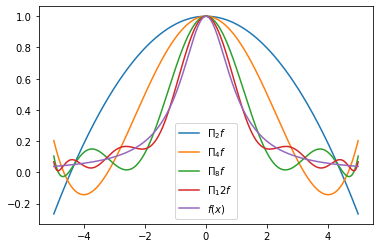

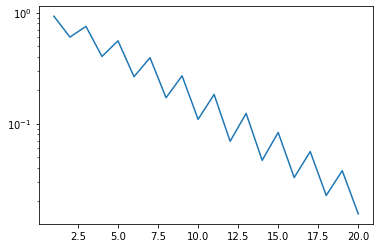

In [23]:
for n in degres:
    p=lagrange_chebychev(f,a,b,n)
    plt.plot(x,np.polyval(p,x),label='$\Pi_'+str(n)+'f$')
plt.plot(x,f(x),label='$f(x)$')
plt.legend()

plt.figure()
erreur=np.zeros(20)
for n in range(1,21):
    erreur[n-1]=max(abs(np.polyval(lagrange_chebychev(f,a,b,n),x)-f(x)))
plt.semilogy(np.arange(1,21),erreur)

Avec ce choix de n&oelig;uds, la convergence de la suite des polynômes d'interpolation vers la fonction est observée.
\newpage

## Exercice bonus (algorithmes de Björck-Pereyra)

Les [algorithmes de Björck-Pereyra](https://doi.org/10.1090/S0025-5718-1970-0290541-1) constituent une application pratique de la forme de Newton du polynôme d'interpolation de Lagrange. Ils permettent une résolution numérique efficace (en termes de stockage et de nombre d'opérations arithmétiques requises) d'un système linéaire de Vandermonde, dont la matrice est caractérisée par la donnée de $n+1$ nombres réels $\alpha_0,\dots,\alpha_n$, $n+1$ étant la dimension du système. Le but de cet exercice est de tester ces algorithmes sur deux exemples considérés dans l'article de Björck et Pereyra.

Deux algorithmes ont été proposés pour tenir compte de la forme du système linéaire de Vandermonde considéré. Le premier s'applique au système, dit <i>primal</i>,
$$
Vx=b
$$
avec
$$
V=\begin{pmatrix}1&1&\dots&1\\\alpha_0&\alpha_1&\dots&\alpha_n\\\vdots&\vdots&&\vdots\\{\alpha_0}^n&{\alpha_1}^n&\dots&{\alpha_n}^n\end{pmatrix}, x=\begin{pmatrix}x_0\\x_1\\\dots\\x_n\end{pmatrix}\text{ et }b=\begin{pmatrix}b_0\\b_1\\\dots\\b_n\end{pmatrix},
$$
les réels $\alpha_0,\dots,\alpha_n$ étants deux à deux distincts, et le second au système, dit <i>dual</i>,
$$
V^\top a=f,
$$
avec
$$
a=\begin{pmatrix}a_0\\a_1\\\dots\\a_n\end{pmatrix}\text{ et }f=\begin{pmatrix}f_0\\f_1\\\dots\\f_n\end{pmatrix}
$$

L'algorithme pour le système dual procède de la façon suivante. La matrice carrée du système linéaire étant de Vandermonde, ses coefficients sont caractérisés par la donnée des $n+1$ nombres réels $\alpha_0,\dots,\alpha_n$. En considérant ces réels comme des n&oelig;uds d'interpolation respectivement associés aux valeurs $f_0,\dots,f_n$ contenues dans le second membre du système linéaire, la solution se trouve alors être l'ensemble des coefficients $a_0,\dots,a_n$ du polynôme d'interpolation de Lagrange associé, écrit dans la base canonique. Pour obtenir ces coefficients, on calcule tout d'abord les coefficients $[\alpha_0]f,\dots,[\alpha_0,\dots,\alpha_n]f$ de la [forme de Newton](https://fr.wikipedia.org/wiki/Interpolation_newtonienne) du polynôme, en se servant de la formule récursive pour les [différences divisées](https://en.wikipedia.org/wiki/Divided_differences). Une fois ceux-ci connus, on obtient un à un les coefficients dans la base canonique, au moyen d'un procédé récursif basé sur la [méthode de Horner](https://en.wikipedia.org/wiki/Horner%27s_method) et consistant à écrire $\Pi_n$ sous la forme
$$
\Pi_n(t)=(\dots([\alpha_0,\dots,\alpha_n]f\,(t-\alpha_{n-1})+[\alpha_0,\dots,\alpha_{n-1}]f)(t-\alpha_{n-2})+\dots+[\alpha_0,\alpha_1]f)(t-\alpha_0)+[\alpha_0]f.
$$
et à y identifier les coefficients recherchés.

En interprétant l'algorithme pour le système dual en termes d'une factorisation UL de l'inverse de $V^\top$, on déduit un algorithme pour le système primal qui s'écrit de la façon suivante :
$$
d_j^{(0)}=b_j,\ j=0,\dots,n.
$$
Pour $k=0,\dots,n-1$,
$$
d_j^{(k+1)}=d_j^{(k)}-\alpha_k\,d_{j-1}^{(k)},\ j=n,\dots,k+1.
$$

$$
x_j^{(n)}=d_j^{(n)},\ j=0,\dots,n.
$$
Pour $k=n-1,\dots,0$,
$$
x_j^{(k+\frac{1}{2})}=\frac{x_j^{(k+1)}}{\alpha_j-\alpha_j-k-1},\ j=k+1,\dots,n,
$$

$$
x_j^{(k)}=x_j^{(k+\frac{1}{2})}-x_{j+1}^{(k+\frac{1}{2})},\ j=k,\dots,n-1.
$$

Les coefficients de la solution sont alors les valeurs $x_j^{(0)}$, $j=0,\dots,n$. On notera que, dans cet algorithme, on utilise la convention qu'un élément $z_j^{(k)}$ non affecté dans une boucle en $j$ prend la valeur de l'élément correspondant à l'étape qui précède dans la boucle en $k$ (c'est-à-dire $z_j^{(k-1)}$ ou $z_j^{(k+1)}$ selon le cas).

**1.** Écrire des fonctions `bjorck_pereyra_primal` et `bjorck_pereyra_dual`, ayant toutes deux pour arguments deux tableaux de même taille, l'un contenant les réels définissant la matrice du système, l'autre contenant les coefficients du second membre du système, renvoyant la solution d'un système linéaire de Vandermonde respectivement primal et dual, calculée par l'algorithme de Björck-Pereyra correspondant.

In [ ]:
def bjorck_pereyra_primal(alpha,b):
    assert len(alpha)==len(b)
    n=len(b)-1
    x=b.copy()
    for k in range(0,n):
        for j in range(n,k,-1):
            x[j]=x[j]-alpha[k]*x[j-1]
    for k in range(n-1,-1,-1):
        for j in range(k+1,n+1):
            x[j]=x[j]/(alpha[j]-alpha[j-k-1])
        for j in range(k,n):
            x[j]=x[j]-x[j+1]
    return x

def bjorck_pereyra_dual(alpha,f):
    assert len(alpha)==len(f)
    n=len(f)-1
    a=f.copy()
    for k in range(0,n):
        for j in range(n,k,-1):
            a[j]=float(a[j]-a[j-1])/float(alpha[j]-alpha[j-k-1])
    for k in range(n-1,-1,-1):
        for j in range(k,n):
            a[j]=a[j]-a[j+1]*alpha[k]
    return a

Les matrices de Vandermonde sont notoirement mal [conditionnées](http://fr.wikipedia.org/wiki/Conditionnement_%28analyse_num%C3%A9rique%29), ce qui signifie que les erreurs d'arrondi dans les calculs nécessaires à la résolution d'un système de Vandermonde affectent fortement la précision de la solution calculée. On va tester la stabilité numérique des algorithmes de Björck-Pereyra sur deux exemples.

Pour tester l'algorithme de résolution de système primal, on choisit
$$
\alpha_i=\frac{1}{i+3}\text{ et }b_i=\frac{1}{2^i},\ i=0,\dots,n,
$$
la solution étant alors donnée par
$$
x_i=(-1)^i\binom{n+1}{k+1}\left(1+\frac{i+1}{2}\right)^n,\ i=0,\dots,n.
$$
**2.** La matrice d'un système de Vandermonde primal étant obtenue avec la commande `np.flipud(np.vander(alpha).T)`, où `alpha` est un tableau contenant les valeurs de réels $\alpha_0,\dots,\alpha_n$, utiliser la fonction `linalg.cond` de Numpy pour tracer le conditionnement de la matrice du système primal considéré ci-dessus en fonction de l'entier $n$, pour des valeurs de $n$ allant de $0$ à $30$ (on utilisera la fonction `semilogy` de Matplotlib). Qu'observe-t-on ?

In [ ]:
N=30
condnumber=[]
for n in range(N+1):
    alpha=1./(np.arange(n+1)+3)
    condnumber.append(np.linalg.cond(np.flipud(np.vander(alpha).T)))
plt.semilogy(range(N+1),condnumber)

On observe que le conditionnement croît exponentiellement avec l'entier $n$.

**3.** Pour $n$ allant de $0$ à $30$, résoudre le système linéaire primal avec la fonction `bjorck_pereyra_primal` d'une part et au moyen d'une factorisation LU de la matrice de Vandermonde d'autre part (via la commande `scp.linalg.lu_solve(scp.linalg.lu_factor(np.flipud(np.vander(alpha).T)),b)` de Scipy), et comparer les résultats en traçant les graphes des erreurs relatives en fonction de $n$ (on utilisera la fonction `semilogy` de Matplotlib). Commenter.

In [ ]:
import scipy as scp
from scipy import linalg
from scipy import special

N=30
err_bp,err_lu=[],[]
for n in range(N+1):
    alpha=1./(np.arange(n+1)+3)
    b=1./pow(2,np.arange(n+1))
    x=pow(-1.,np.arange(n+1))*scp.special.binom(n+1,np.arange(n+1)+1)*pow(1.+0.5*(np.arange(n+1)+1),n)
    x_bp=bjorck_pereyra_primal(alpha,b)
    err_bp.append(np.linalg.norm((x_bp-x)/x,np.inf))
    x_lu=scp.linalg.lu_solve(scp.linalg.lu_factor(np.flipud(np.vander(alpha).T)),b)
    err_lu.append(np.linalg.norm((x_lu-x)/x,np.inf))
plt.title("erreur relative")
plt.semilogy(range(N+1),err_bp,label="Björck-Pereyra")
plt.semilogy(range(N+1),err_lu,label="LU")
plt.legend()

On observe sur cet exemple une bien meilleure stabilité numérique pour l'algorithme de Bjoörck-Pereyra que pour la résolution par factorisation LU.

Pour tester l'algorithme de résolution de système dual, on choisit à présent
$$
\alpha_i=\frac{1}{i+2}\text{ et }f_i=T_n(\alpha_i),\ i=0,\dots,n,
$$
où $T_n$ est le polynôme de Chebyshev de degré $n$. La solution du système est alors constituée par les coefficients de $T_n$ dans la base canonique. Avec Numpy, ceux-ci sont calculables avec la commande :

`np.polynomial.chebyshev.cheb2poly(np.polynomial.chebyshev.Chebyshev(np.concatenate([np.zeros(n),np.ones(1)])).coef)`

et la valeur de $T_n$ en un point $x$ est obtenue par la commande :

`np.polynomial.chebyshev.chebval(x,np.concatenate([np.zeros(n),np.ones(1)]))`.

Enfin, la matrice de Vandermonde du système dual s'obtient avec la commande `np.fliplr(np.vander(alpha))`.

**4.** Reprendre les deux précédentes questions en considérant cette fois la résolution du système linéaire dual (on tracera les graphes des erreurs <i>absolues</i>, certaines composantes de la solution étant nulles).

In [ ]:
N=30
condnumber,err_bp,err_lu=[],[],[]
for n in range(N+1):
    alpha=1./(np.arange(n+1)+2)
    f=np.polynomial.chebyshev.chebval(alpha,np.concatenate([np.zeros(n),np.ones(1)]))
    a=np.polynomial.chebyshev.cheb2poly(np.polynomial.chebyshev.Chebyshev(np.concatenate([np.zeros(n),np.ones(1)])).coef)
    VT=np.fliplr(np.vander(alpha))
    condnumber.append(np.linalg.cond(VT))
    a_bp=bjorck_pereyra_dual(alpha,f)
    err_bp.append(np.linalg.norm((a_bp-a),np.inf))
    a_lu=scp.linalg.lu_solve(scp.linalg.lu_factor(VT),f)
    err_lu.append(np.linalg.norm((a_lu-a),np.inf))
plt.figure()
plt.title("conditionnement")
plt.semilogy(range(N+1),condnumber)
plt.figure()
plt.title("erreur absolue")
plt.semilogy(range(N+1),err_bp,label="Björck-Pereyra")
plt.semilogy(range(N+1),err_lu,label="LU")
plt.legend()

Pour ce second exemple, le conditionnement des matrice croît aussi exponentiellement avec l'entier $n$. En revanche, l'algorithme de Björk-Pereyra ne présente pas la même stabilité que celui pour le système primal et s'avère d'ailleurs bien moins précis que la résolution par factorisation LU pour des valeurs de $n$ supérieures à $15$.